# Analisis Netflix  
**Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## carga de los datos

In [2]:
df = pd.read_csv('NetflixViewingHistory.csv', parse_dates=['Date'])

In [3]:
df.head()

,Title,Date
0,The Social Dilemma,2020-10-29
1,The Intern,2020-10-28
2,Moneyball,2020-10-28
3,Emily in Paris: Season 1: Emily in Paris,2020-10-28
4,The End of the F***ing World: Season 1: Episode 1,2020-10-28


In [4]:
#Cantidad de filas y columnas
df.shape

(240, 2)

In [5]:
#Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Title   240 non-null    object        
 1   Date    240 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 3.9+ KB


**Comentario**  
- existe un patron en el titulo que divide en partes por medio de los dos puntos

In [6]:
#sepracion del titulo en columnas
separacion= df.Title.str.split(pat =':', expand=False).to_frame()
separacion.head()

,Title
0,[The Social Dilemma]
1,[The Intern]
2,[Moneyball]
3,"[Emily in Paris, Season 1, Emily in Paris]"
4,"[The End of the F***ing World, Season 1, Epi..."


In [7]:
#Conteo del numero de las partes
separacion['num_partes'] = separacion.Title.apply(len)
separacion.head()

,Title,num_partes
0,[The Social Dilemma],1
1,[The Intern],1
2,[Moneyball],1
3,"[Emily in Paris, Season 1, Emily in Paris]",3
4,"[The End of the F***ing World, Season 1, Epi...",3


In [8]:
#Cantar el numero de partes
separacion.num_partes.value_counts()

3    148
1     48
4     35
2      9
Name: num_partes, dtype: int64

In [9]:
#Verificar la lista de los numeros de las partes filtrar
separacion[separacion.num_partes==3].head(10)

,Title,num_partes
3,"[Emily in Paris, Season 1, Emily in Paris]",3
4,"[The End of the F***ing World, Season 1, Epi...",3
8,"[100 Humans, Season 1, The Best Age to Be Al...",3
10,"[Our Planet, Season 1, Frozen Worlds]",3
11,"[Our Planet, Season 1, One Planet]",3
14,"[Friends, Season 1, The One with the Birth]",3
15,"[Love Is Blind, Season 1, Will You Marry Me?]",3
16,"[Love Is Blind, Season 1, Is Love Blind?]",3
18,"[How to Live Mortgage Free with Sarah Beeny, ...",3
20,"[Dream Home Makeover, Season 1, Manor House ...",3


In [10]:
separacion[separacion.num_partes==1].head(10)

,Title,num_partes
0,[The Social Dilemma],1
1,[The Intern],1
2,[Moneyball],1
6,[Silver Linings Playbook],1
7,"[Definitely, Maybe]",1
9,[Eat Pray Love],1
12,[The Exam],1
13,[The Heartbreak Kid],1
17,[The Women],1
19,[Maid in Manhattan],1


In [11]:
separacion[separacion.num_partes==2].head(10)

,Title,num_partes
5,"[Sex and the City, The Movie]",2
27,"[David Attenborough, A Life on Our Planet]",2
30,"[Minimalism, A Documentary About the Importan...",2
65,"[The Show Must Go On, The Queen + Adam Lamber...",2
71,"[Black Mirror, Bandersnatch]",2
102,"[Eurovision Song Contest, The Story of Fire S...",2
129,"[Diana, In Her Own Words]",2
135,"[Elizabeth, The Golden Age]",2
236,"[Mowgli, Legend of the Jungle]",2


In [12]:
separacion[separacion.num_partes==4].head(10)

,Title,num_partes
60,"[Chesapeake Shores, Season 1, Home to Roost,...",4
61,"[Chesapeake Shores, Season 1, Pilot, Part 2]",4
62,"[Chesapeake Shores, Season 1, Pilot, Part 1]",4
79,"[Cable Girls, Season 3, Chapter 24, Destiny]",4
95,"[Cable Girls, Season 3, Chapter 23, Hope]",4
100,"[Friends, Season 1, The One with the Two Par...",4
103,"[Friends, Season 1, The One with the Two Par...",4
110,"[Cable Girls, Season 3, Chapter 22, Fight]",4
116,"[Trump, An American Dream, Season 1, Citize...",4
117,"[Trump, An American Dream, Season 1, The Ga...",4


## Crear variables

### Variables derivadas del titulo

In [13]:
#Crear la column tipo: cuando el numero de partes sea menor a tres 
#consideramos como pelicula lo de mas sera una serie
separacion['tipo'] = np.where(separacion.num_partes<3,'pelicula','serie')
separacion.head()

,Title,num_partes,tipo
0,[The Social Dilemma],1,pelicula
1,[The Intern],1,pelicula
2,[Moneyball],1,pelicula
3,"[Emily in Paris, Season 1, Emily in Paris]",3,serie
4,"[The End of the F***ing World, Season 1, Epi...",3,serie


In [14]:
separacion.tipo.value_counts()

serie       183
pelicula     57
Name: tipo, dtype: int64

In [15]:
#unir la calumna tipo de separacion al df
df = pd.concat([df, separacion['tipo']], axis = 1)
df.head()

,Title,Date,tipo
0,The Social Dilemma,2020-10-29,pelicula
1,The Intern,2020-10-28,pelicula
2,Moneyball,2020-10-28,pelicula
3,Emily in Paris: Season 1: Emily in Paris,2020-10-28,serie
4,The End of the F***ing World: Season 1: Episode 1,2020-10-28,serie


In [16]:
#Dividir los tipos en sus diferentes niveles
separacion_cols = df.Title.str.split(':', expand=True)
#Renombrar las columnas
separacion_cols.columns= ['Title', 'nivel1','nivel2','nivel3']
separacion_cols.head()

,Title,nivel1,nivel2,nivel3
0,The Social Dilemma,None,None,None
1,The Intern,None,None,None
2,Moneyball,None,None,None
3,Emily in Paris,Season 1,Emily in Paris,None
4,The End of the F***ing World,Season 1,Episode 1,None


In [17]:
#Unir al dataset
df =pd.concat([df, separacion_cols[['nivel1','nivel2','nivel3']]], axis =1)
df.head()

,Title,Date,tipo,nivel1,nivel2,nivel3
0,The Social Dilemma,2020-10-29,pelicula,None,None,None
1,The Intern,2020-10-28,pelicula,None,None,None
2,Moneyball,2020-10-28,pelicula,None,None,None
3,Emily in Paris: Season 1: Emily in Paris,2020-10-28,serie,Season 1,Emily in Paris,None
4,The End of the F***ing World: Season 1: Episode 1,2020-10-28,serie,Season 1,Episode 1,None


### Variables derivadas de la fecha

In [18]:
#cololocar la fecha como indice
df.set_index('Date', inplace =True)
df.head(2)

,Title,tipo,nivel1,nivel2,nivel3
Date,,,,,
2020-10-29,The Social Dilemma,pelicula,None,None,None
2020-10-28,The Intern,pelicula,None,None,None


In [19]:
#Funcion parat extraer de la fecha los componentes (año, mes.....)
def ext_fecha(data):
    data['año'] = data.index.year
    data['mes'] = data.index.month_name()
    data['mes_num'] = data.index.month
    data['dia_mes'] = data.index.day
    data['dia_semana'] =data.index.day_name()
    return data

In [20]:
ext_fecha(df)

,Title,tipo,nivel1,nivel2,nivel3,año,mes,mes_num,dia_mes,dia_semana
Date,,,,,,,,,,
2020-10-29,The Social Dilemma,pelicula,None,None,None,2020,October,10,29,Thursday
2020-10-28,The Intern,pelicula,None,None,None,2020,October,10,28,Wednesday
2020-10-28,Moneyball,pelicula,None,None,None,2020,October,10,28,Wednesday
2020-10-28,Emily in Paris: Season 1: Emily in Paris,serie,Season 1,Emily in Paris,None,2020,October,10,28,Wednesday
2020-10-28,The End of the F***ing World: Season 1: Episode 1,serie,Season 1,Episode 1,None,2020,October,10,28,Wednesday
...,...,...,...,...,...,...,...,...,...,...
2020-03-29,Money Heist: Part 1: Episode 1,serie,Part 1,Episode 1,None,2020,March,3,29,Sunday
2020-03-28,Mowgli: Legend of the Jungle,pelicula,Legend of the Jungle,None,None,2020,March,3,28,Saturday
2020-03-28,Revenge,pelicula,None,None,None,2020,March,3,28,Saturday


## Análisis

### Cuanto tiempo lleva contratado netflix

In [21]:
from datetime import date

In [22]:
# crear variable de fecha el dia de hoy
hoy = pd.Timestamp(date.today())

#Buscar el primer dia de fecha de inicio
primer_dia = df.index.min()

#Calcular el tiempo
tiempo = hoy - primer_dia

print('El tiempo que llevas usando de Netflix es de {} dias'.format(tiempo.days))

El tiempo que llevas usando de Netflix es de 1426 dias


### Cuanto gasto en Netflixt
- El costo de netflix es de mesual: US$6.99
- tasa del peso es de 58.61

In [23]:
costo_mensual = 6.99
conversion = 6.99 * 58.61 
gasto = tiempo.days/30 * costo_mensual
en_pesos = tiempo.days/30 * conversion
print('El gasto hasta ahora es de U${} en pesos es de ${}'.format(gasto, en_pesos))

El gasto hasta ahora es de U$332.258 en pesos es de $19473.641379999997


### Que tiempo le dedicas a Netflix  
- Suponemos que una serie dura 45 minutos y una pelicula 100 minutos

In [24]:
serie = 45
pelicula = 100

In [25]:
consumo = df['tipo'].value_counts()
consumo

serie       183
pelicula     57
Name: tipo, dtype: int64

In [26]:
#calcular el minuto por peliculas
min_peli = consumo['pelicula'] * pelicula

#calcular el minuto por seires
min_serie = consumo['serie'] * serie

#calcular al año
peli_ano = min_peli /60/24
serie_ano = min_serie /60/24

print('Al año le dedicas {} dias en series y en peliculas le dedicas {} dias'.format(round(serie_ano),
                                                                                     round(peli_ano)))

Al año le dedicas 6 dias en series y en peliculas le dedicas 4 dias


### Cuales son las 10 series que has visto mas?

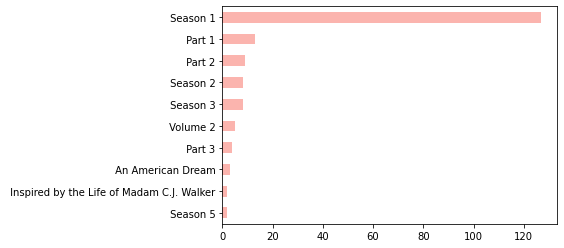

In [27]:
df[df.tipo =='serie'].nivel1.value_counts().head(10).sort_values(ascending =True).plot.barh(cmap = 'Pastel1');

### Dia de la semana de mayor consumo?

In [28]:
df.columns

Index(['Title', 'tipo', 'nivel1', 'nivel2', 'nivel3', 'año', 'mes', 'mes_num',
       'dia_mes', 'dia_semana'],
      dtype='object')

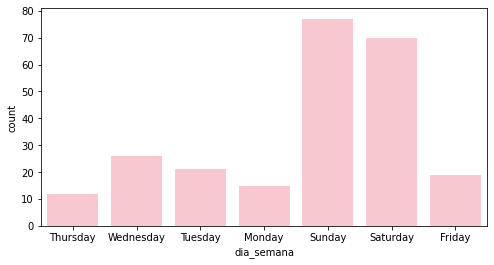

Sunday       77
Saturday     70
Wednesday    26
Tuesday      21
Friday       19
Monday       15
Thursday     12
Name: dia_semana, dtype: int64


In [29]:
plt.figure(figsize = [8,4])
sns.countplot(x = df.dia_semana, color= 'pink')
plt.show()

print(df.dia_semana.value_counts())

### existen diferencias entre series y peliculas

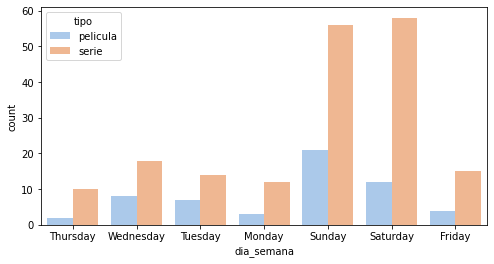

In [30]:
plt.figure(figsize = [8,4])
sns.countplot(x = df.dia_semana, hue = df.tipo, palette='pastel')
plt.show()

### El consumo a lo largo del año es constante o hay meses de mayor consumo

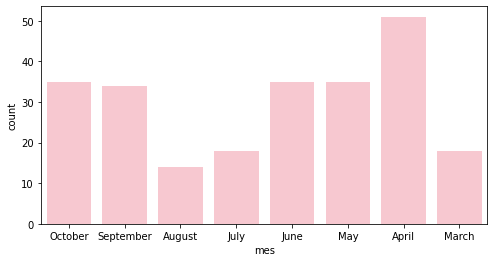

April        51
October      35
June         35
May          35
September    34
July         18
March        18
August       14
Name: mes, dtype: int64


In [31]:
plt.figure(figsize = [8,4])
sns.countplot(x = df.mes, color ='pink')
plt.show()
print(df.mes.value_counts())

## Exportar Datos

In [34]:
df.to_excel('data.xlsx')